In [54]:
import sqlite3
import pprint
import time
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("switrs.sqlite")

In [20]:
def queryExecute(q):
    st = time.time()
    
    cursor = conn.cursor()
    cursor.execute(q)
    
    et = time.time()
    t = et-st
    print('Query Execution time:', time.strftime("%S", time.localtime(t)), "Seconds") #https://pynative.com/python-get-execution-time-of-program/
    
    return cursor

## Display Number of rows in each table of database

In [21]:
# Table case_ids
query = "SELECT COUNT(case_id) FROM case_ids;"
res = queryExecute(query)
print("Query Result")
pprint.pprint(res.fetchall()[0][0])

Query Execution time: 00 Seconds
Query Result
9424334


In [17]:
# Table collisions
query = "SELECT COUNT(case_id) FROM collisions;"
res = queryExecute(query)
print("Query Result")
pprint.pprint(res.fetchall()[0][0])

Query Execution time: 08 Seconds
Query Result
9424334


In [18]:
# Table parties
query = "SELECT COUNT(case_id) FROM parties;"
res = queryExecute(query)
print("Query Result")
pprint.pprint(res.fetchall()[0][0])

Query Execution time: 09 Seconds
Query Result
18669166


In [19]:
# Table victims
query = "SELECT COUNT(case_id) FROM victims;"
res = queryExecute(query)
print("Query Result")
pprint.pprint(res.fetchall()[0][0])

Query Execution time: 02 Seconds
Query Result
9639334


In [29]:
# Table victims
query = "PRAGMA table_info(collisions);"
res = queryExecute(query)
print("Query Result")
display(pd.DataFrame(res.fetchall()))

Query Execution time: 00 Seconds
Query Result


,0,1,2,3,4,5
0,0,case_id,TEXT,0,None,0
1,1,jurisdiction,INT,0,None,0
2,2,officer_id,TEXT,0,None,0
3,3,reporting_district,TEXT,0,None,0
4,4,chp_shift,TEXT,0,None,0
...,...,...,...,...,...,...
70,70,latitude,REAL,0,None,0
71,71,longitude,REAL,0,None,0
72,72,collision_date,TEXT,0,None,0
73,73,collision_time,TEXT,0,None,0


[]

## Indexing the four tables

In [40]:
# Table case_ids
query = "CREATE INDEX ind_case_id on case_ids (case_id);"
r=queryExecute(query)

Query Execution time: 03 Seconds


In [42]:
# Table collisions, victims, parties
query = "CREATE INDEX ind_collision on collisions (case_id);"
r=queryExecute(query)

query = "CREATE INDEX ind_parties on parties (case_id);"
r=queryExecute(query)

query = "CREATE INDEX ind_victims on victims (case_id);"
r=queryExecute(query)

Query Execution time: 04 Seconds
Query Execution time: 20 Seconds
Query Execution time: 08 Seconds


## Trend of accidents and fatalities by year

Query Execution time: 05 Seconds
Query Result


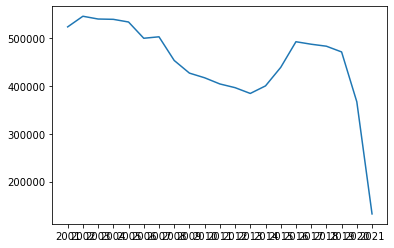

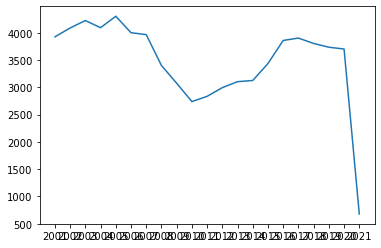

,no_accidents,year,total_fatalities
0,522562,2001,3926
1,544741,2002,4089
2,538954,2003,4225
3,538295,2004,4094
4,532725,2005,4304
5,498846,2006,4002
6,501908,2007,3967
7,452595,2008,3401
8,426228,2009,3076
9,416490,2010,2739


In [57]:
# https://www.designcise.com/web/tutorial/how-to-group-by-month-and-year-in-sqlite 
query = "SELECT COUNT(case_id) as no_accidents,\
        strftime('%Y', collision_date) as year,\
        SUM(killed_victims) as total_fatalities\
        FROM collisions\
        GROUP BY year\
        ORDER BY year ASC;"
res = queryExecute(query)
print("Query Result")
df = pd.DataFrame(res.fetchall(), columns = [description[0] for description in res.description])
plt.plot(df.year,df.no_accidents)
plt.show()
plt.plot(df.year,df.total_fatalities)
plt.show()
display(df)